
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 58 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): TF, Description, GeneRatio, BgRatio, Ontology
dbl (4): Gene Count, pvalue, p.adjust, OddsRatio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


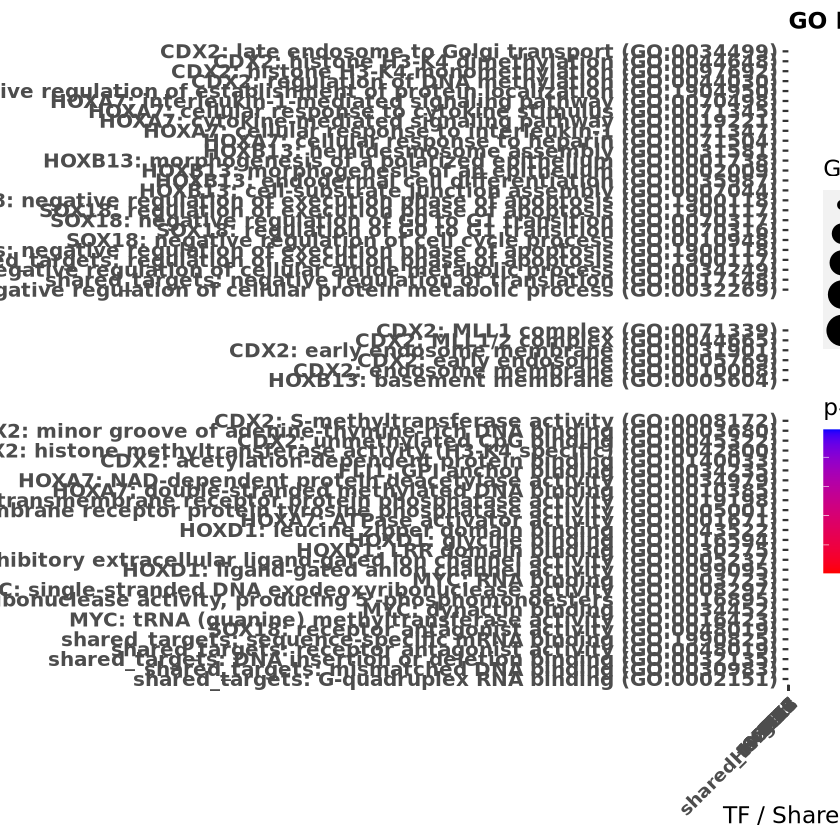

In [1]:
library(ggplot2)
library(dplyr)
library(readr)

# Load data
go_combined <- read_csv("TF_enrichment/GO_combined_enrich_like_clusterProfiler.csv")

# Filter and prepare
filtered_go <- go_combined %>%
  filter(p.adjust < 0.05) %>%
  group_by(TF, Ontology) %>%
  slice_min(order_by = p.adjust, n = 10, with_ties = FALSE) %>%
  ungroup() %>%
  mutate(Description = paste0(TF, ": ", Description)) %>%
  arrange(Ontology, TF, p.adjust)

# Factorized order
filtered_go$Description <- factor(filtered_go$Description, levels = rev(unique(filtered_go$Description)))

filtered_go$Ontology <- recode(
  filtered_go$Ontology,
  "Cellular Component" = "Cellular\nComponent",
  "Biological Process" = "Biological\nProcess",
  "Molecular Function" = "Molecular\nFunction"
)
 
# Plot
ggplot(filtered_go, aes(x = TF, y = Description)) +
  geom_point(aes(size = `Gene Count`, color = p.adjust)) +
  scale_color_gradient(low = "red", high = "blue", name = "p-adjust") +
  scale_size(range = c(2, 8)) +
  facet_grid(Ontology ~ ., scales = "free_y", space = "free", switch = "y") +
  labs(
    title = "GO Enrichment per TF and Shared Genes",
    x = "TF / Shared",
    y = NULL
  ) +
  theme_bw(base_size = 14) +
  theme(
    panel.background = element_rect(fill = "gray95"),
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(size = 12, face = "bold"),
    strip.placement = "outside",
    strip.text.y.right = element_text(angle = 0, face = "bold", size = 16),
    strip.text.y.left = element_text(angle = 90, face = "bold", size = 14),
    #strip.background = element_rect(fill = "gray95", color = "black"),
    panel.spacing.y = unit(1.2, "lines"),
    plot.title = element_text(face = "bold", size = 14, hjust=0),
    legend.position = "right"
  )

# Save
#ggsave("TF_enrichment/GO_dotplot_TF_right_facet_boxed.png", width = 14, height = 14, dpi = 300)
ggsave("panel1-sf4.pdf", width = 14, height = 14, dpi = 300)

Rows: 15 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): TF, Description, GeneRatio, BgRatio, Ontology
dbl (4): Gene Count, pvalue, p.adjust, OddsRatio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


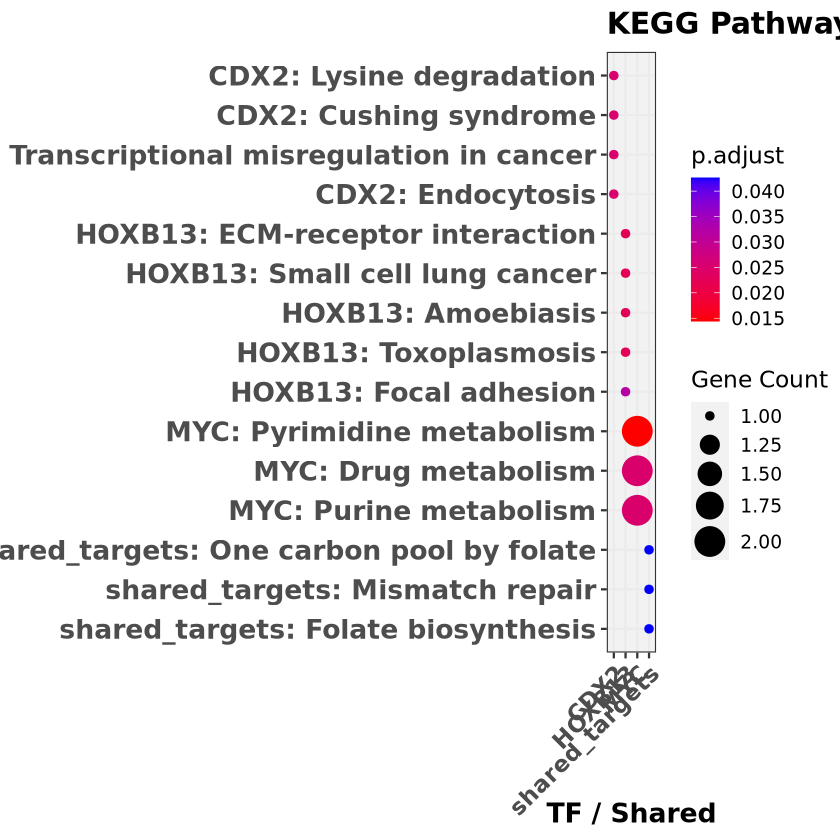

In [2]:
library(ggplot2)
library(dplyr)
library(readr)

# Load KEGG enrichment results
kegg_df <- read_csv("TF_enrichment/KEGG_combined_enrich_like_clusterProfiler.csv")

# Filter for significant pathways
filtered_kegg <- kegg_df %>%
  filter(p.adjust < 0.05)

# Get top 10 per TF
top_kegg_combined <- filtered_kegg %>%
  group_by(TF) %>%
  slice_min(order_by = p.adjust, n = 10, with_ties = FALSE) %>%
  ungroup()

# Reorder Description within TF groups for consistent layout
top_kegg_combined <- top_kegg_combined %>%
  mutate(Description = paste0(TF, ": ", Description)) %>%
  arrange(TF, p.adjust)

# Factorize for y-axis order
top_kegg_combined$Description <- factor(top_kegg_combined$Description, levels = rev(unique(top_kegg_combined$Description)))

# Plot
ggplot(top_kegg_combined, aes(x = TF, y = Description)) +
  geom_point(aes(size = `Gene Count`, color = p.adjust)) +
  scale_color_gradient(low = "red", high = "blue", name = "p.adjust") +
  scale_size(range = c(2, 8)) +
  labs(
    title = "KEGG Pathway Enrichment",
    x = "TF / Shared",
    y = NULL
  ) +
  theme_bw(base_size = 14) +
  theme(
    panel.background = element_rect(fill = "gray95"),
    axis.title       = element_text(face = "bold", size = 16),
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold", size=14),
    axis.text.y = element_text(size = 16, face = "bold"),
    panel.spacing.y = unit(1.5, "lines"),
    plot.title = element_text(face = "bold", size = 18),
    legend.position = "right"
  )

# Save
ggsave("TF_enrichment/KEGG_dotplot_by_TF_fig4.pdf", width = 10, height = 8, dpi = 300)
